In [1]:
from fastai2.vision.all import *

%load_ext autoreload
%autoreload 2

In [2]:
cv_source = untar_data(URLs.CAMVID_TINY)
cv_items = get_image_files(cv_source/'images')
cv_splitter = RandomSplitter(seed=42)
cv_split = cv_splitter(cv_items)
cv_label = lambda o: cv_source/'labels'/f'{o.stem}_P{o.suffix}'

In [5]:
tfms = [[PILImage.create], [cv_label, PILMask.create]]
cv_dsets = Datasets(cv_items, tfms, splits=cv_split)
dls = cv_dsets.dataloaders(bs=64, after_item=[Resize(128), ToTensor(), IntToFloatTensor()])

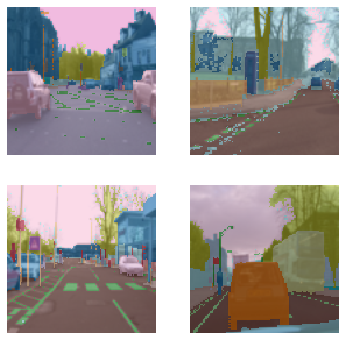

In [6]:
dls.show_batch(max_n = 4);

In [7]:
b = dls.one_batch()
b[0].shape, type(b[0]), b[1].shape, type(b[1])

(torch.Size([64, 3, 128, 128]),
 fastai2.torch_core.TensorImage,
 torch.Size([64, 128, 128]),
 fastai2.torch_core.TensorMask)